# 1
you remember the logistic model for population dynamics: xₜ₊₁ = r xₜ (1 – xₜ), where r is the growth rate. Check how sensitive dinosaur populations react to small changes in their initial population. Simulate an evolving population for 100 months, once with a starting value of 0.500000000 and once with 0.500000005. Simulate two scenarios with r = 3.5 and r = 3.9, and describe your observations. (3P)

In [15]:
import os
os.chdir("/Users/kim-wonjin/Documents/CLEWS/Python/Nonlinear/hw3")
import numpy as np
import matplotlib.pyplot as plt
import math

In [19]:
# function
def logmap(r, T, x0, Ttrans = 100):
    a_ts = np.hstack([x0, np.zeros(T+Ttrans)])
    for i in range(1, T+Ttrans+1):
        xn = a_ts[i-1]
        a_ts[i] = r*xn*(1-xn) 
    return a_ts[Ttrans+1:]

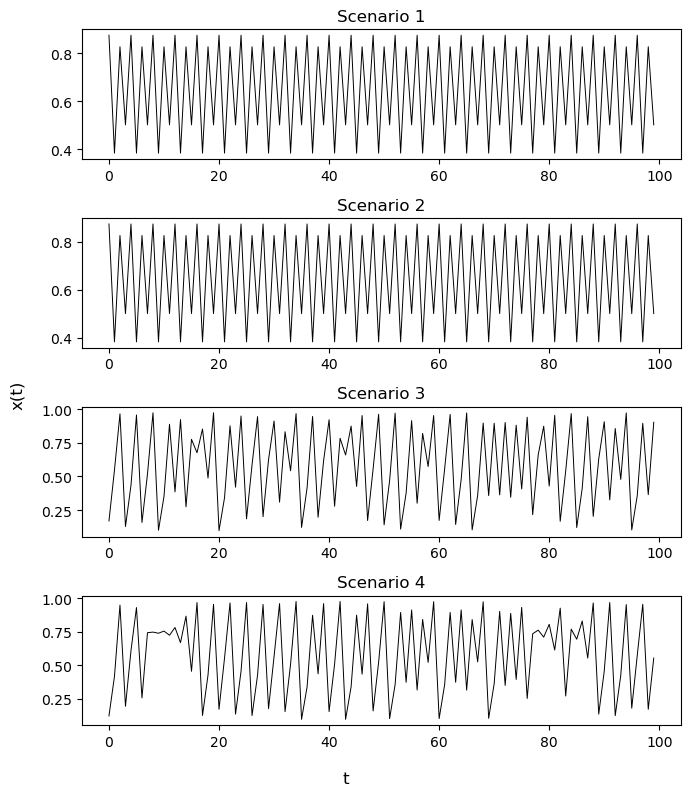

In [22]:
scenario_1 = logmap(r = 3.5 , T = 100, x0 = 0.5, Ttrans = 100)
scenario_2 = logmap(r = 3.5 , T = 100, x0 = 0.500000005, Ttrans = 100)
scenario_3 = logmap(r = 3.9 , T = 100, x0 = 0.5, Ttrans = 100)
scenario_4 = logmap(r = 3.9 , T = 100, x0 = 0.500000005, Ttrans = 100)

scenarios = [scenario_1, scenario_2, scenario_3, scenario_4]

# plot
fig, axs = plt.subplots(4, 1, figsize=(7, 8), sharex=False)
for i in range(4):
    axs[i].plot(scenarios[i], color='black', linewidth=0.7)
    axs[i].set_title(f"Scenario {i+1}")
fig.supxlabel("t", fontsize=12) #xlabel for entire graphs
fig.supylabel("x(t)", fontsize=12) #xlabel for entire graphs
plt.tight_layout()
plt.show()


When growth rate(r) = 3.5, population doesn't changed by starting value.
However, when r = 3.9, population changes by only a small change of starting value(= 0.000000005). Comparison Scenario 3 to Scenario 4, between time 0 to 20 and time 75 to 90, there are major different pattern appeared.

# 2
Who knows how these giant lizards will multiply? Compute a time series for each growth rate between 2.5 ≤ r < 4 using np.arange(2.5, 4.0, 0.01). Visualize all outcomes in a single scatter plot by plotting all magnitudes for a fixed growth rate on the y-axis against the growth rates on the x-axis. Hint: This is the famous bifurcation diagram of the logistic map. Discuss whether you can distinguish between different multiplication regimes. (3P)

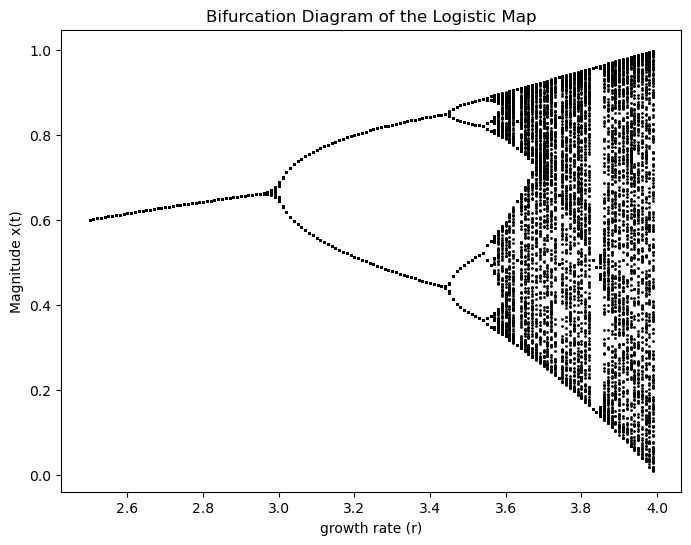

In [36]:
r_list = np.arange(2.5, 4.0, 0.01)

r_all = []
x_all = []

for r in r_list:
    ts = logmap(r = r, T = 200, x0 = 0.5, Ttrans = 100)
    r_all.extend([r] * len(ts))                  # saving each r
    x_all.extend(ts)                             # saving each magnitude

plt.figure(figsize=(8,6))
plt.scatter(r_all, x_all, s=1, color='black')
plt.xlabel("growth rate (r)")
plt.ylabel("Magnitude x(t)")
plt.title("Bifurcation Diagram of the Logistic Map")
plt.show()

- r = 2.6 ~ 3.0 : Magnitude of dinosaurs only have one stable values
- r = 3.0 ~ 3.4 : Magnitude of dinosaurs have two stable values
- r = 3.4 ~ 3.5 : Magnitude of dinosaurs have four stable values
- r > 3.5 : chaos


# 3
Your boss wants to know how a population of Spinosaurus Aegyptiacus will grow from one month to the next. The only information he can provide is that “they multiply somewhat chaotically.” Generate time series for growth rates from np.arange(3.6, 4.0, 0.12) and shift each against itself with a lag of 1. Visualize the result in a scatter plot (Poincaré section). Report whether you observe any regularity. (5P)

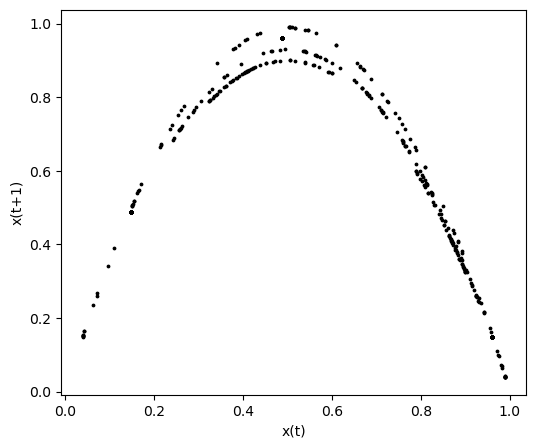

In [38]:
r_list2 = np.arange(3.6, 4.0, 0.12)
x_list = []
y_list = []

for r in r_list2:
    ts = logmap(r, T = 100, x0 = 0.5, Ttrans = 100)
    x_list.extend(ts[:-1])      # x(t)
    y_list.extend(ts[1:])       # x(t+1)

plt.figure(figsize=(6,5))
plt.scatter(x_list, y_list, s=3, color='black')
plt.xlabel("x(t)")
plt.ylabel("x(t+1)")
plt.show()

there is no regularity.

# 4
Your ex-boss got eaten by a pack of Velociraptors. The new boss is even more demanding and wants you to get those raptors under control. You have data on three past populations with growth rates r = 3.59300, 3.56995, and 3.68000. Generate a time series for each and represent it by a recurrence plot with ε = 0.03. Decide which population might be easiest to control and justify your choice. (9P)

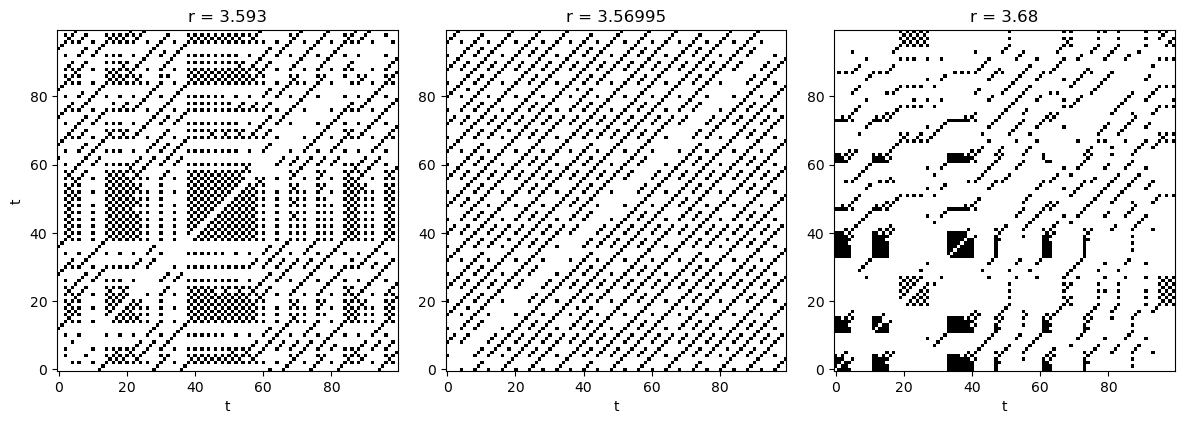

In [55]:
r_values = [3.59300, 3.56995, 3.68000]
eps = 0.03

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, r in enumerate(r_values):
    ts = logmap(r = r, T = 100, x0 = 0.5, Ttrans = 100)
    # distance between two spot
    distance = np.abs(ts[:, None] - ts[None, :])
    # recurrence matrix
    R = (distance < eps).astype(int)
    # remove diagonal for avoiding calculate the distance with itself
    diag = np.diag_indices_from(R)
    R[diag] = 0

    # plot
    ax = axes[i]
    ax.imshow(R, cmap='binary', origin='lower')
    ax.set_title(f"r = {r}")
    ax.set_xlabel("t")
    if i == 0:
        ax.set_ylabel("t")

plt.tight_layout()
plt.show()


r = 3.56995, Recurrence plot show x(t) = Magnitude of dinosaur is periodic. But in r = 3.593, 3.68 this RPs shows chaotic. So growth rate 3.56995 is the easiest control, because I can predict the dinosuar magnitude periodically.